# 0. Read network file

In [1]:
from networkx.readwrite import json_graph
import json

In [2]:
def load_graph (graph_path):
    """
    load a graph from JSON
    """
    with open(graph_path) as f:
        data = json.load(f)
        graph = json_graph.node_link_graph(data, directed=True)
        return graph

In [28]:
graph_path = "/home/zhaowany/INCAS/incas-iu/workflow/notebooks/check_txSRL/level4/log_odd_2020-03-04_2020-03-08_bk_w_further_filter_net.json"

In [29]:
G = load_graph(graph_path)

# 1. Network visualization is common

In [30]:
import pandas as pd
import networkx as nx

Thanks to NetworkX and other visualization tools such as Gephi, network visualization is both convenient and commonly used by researchers to identify interesting structural patterns. For more visualization options, please visit NetworkX documentation.

Let's create a few network visualizations with NetworkX on our narrative network, which is constructed by connecting narrative triplets--- <span style="font-size:1.em">(</span>
<span style="font-size:1.em;color:green">ARG-0</span>
<span style="font-size:1.em"> ,</span>
<span style="font-size:1.em;color:red">Verb/Frame</span>
<span style="font-size:1.em"> ,</span>
<span style="font-size:1.em;color:blue">ARG-1</span>
<span style="font-size:1.em"> )</span>

First, we apply simple *draw_networkx* function.

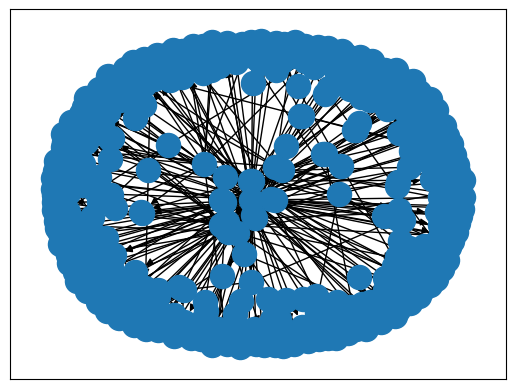

In [31]:
nx.draw_networkx(G, with_labels=False)

Then we apply a complex drawing function with a Kamada-Kawai force-directed layout. 

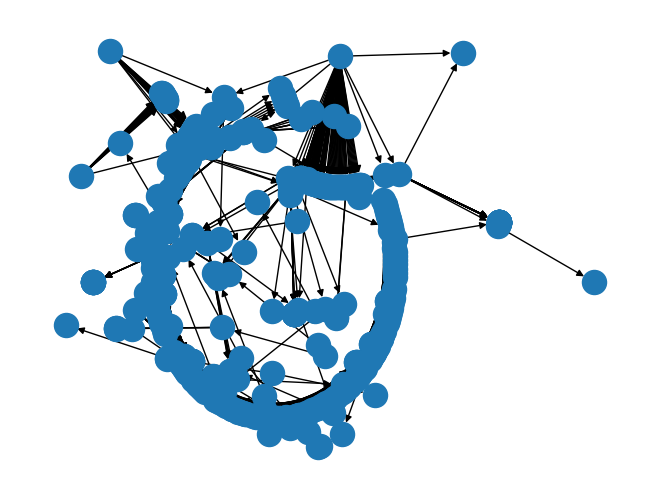

In [38]:
nx.draw_kamada_kawai(G)

### As you can see,  
both visualizations emphasize the nodes, which in our case are the Agents and Patients extracted using Semantic Role Labeling. However, they fail to incorporate the information of the edges, which represent the Actions connecting the Agents and Patients. Although this approach conveys more information than a traditional co-word network by reflecting how different concepts connect rather than merely showing word co-occurrence relations, it still lacks the depth we need. Therefore, we should explore other network visualization options to better represent these connections.

# 2. Narrative network visualization is uncommon
For detailed configuration of the visualization, please refer to:  
https://pyvis.readthedocs.io/en/latest/tutorial.html

In [33]:
from networkx.readwrite import json_graph
from pyvis.network import Network

In [34]:
net = Network(notebook=True)
net.from_nx(G)
net.show("example.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## flexibly adjust the visual details

The visualization can be dynamically adjusted with the settings. By simply copying and pasting the configuration, you can output the desired visualization. For more details about configuration, please visit [PyVis documentation](https://pyvis.readthedocs.io/en/latest/tutorial.html#using-the-configuration-ui-to-dynamically-tweak-network-settings).

Here is an example of the same network with some configuration adjustments on node size, color, and force-directed layout.

In [35]:
def format_node_label(label, position):
    words = label.split(" ")
    idxs = range(0, len(words), position)
    new_label = ""
    for idx in idxs:
        new_label += " ".join(words[idx:idx+position]) + '\n'
    return new_label.strip()

def draw_network(G, output, labels = False):
    nodes = list(G.nodes())
    nt = Network('1500px', '1500px') #, select_menu=True)
    

    
    for idx, node in enumerate(nodes):
        in_degree = G.in_degree(node)
        out_degree = G.out_degree(node)
        degree = G.degree(node)
        
        
        top_label = 0
        for u,v,a in G.edges(node, data=True):
            if a["top"]:
                top_label =1
                
        for u,v,a in G.in_edges(node, data=True):
            if a["top"]:
                top_label =1
        
        font = f"{degree*4}px arial black"
        if labels:
            # "20px arial rgba(46,56,63,0.7)"  to show label
            font = "20px arial rgba(46,56,63,0.7)" 
        
           
        
            
        color = "rgba(46,56,63,0.5)" # grey
        if top_label == 1:
            font = "35px arial rgba(46,56,63,1)"
        
        #if degree >=3:
        #    font = "100px arial rgba(46,56,63,1)"
        
        if in_degree >= 10: # dark green
                color = "rgba(7,97,125,1)"
                font = f"190px arial rgba(192,64,0,1)" #rgba(187,55,236,1)"
        if out_degree >=10: # light blue
                color = "rgba(249,168,40,1)"
                font = f"190px arial rgba(192,64,0,1)"

        
                
        label = format_node_label(node, 1)
        if len(label)> 20:
            label = label[:20]+' ...'
        nt.add_node(idx, #size = 5, 
                    font = font,
                    label = label, 
                    #shape = "circle", 
                    color = color)

    for u,v,a in G.edges(data=True):
        id1 = nodes.index(u)
        id2 = nodes.index(v)
        
        color = "rgba(79,91,39,0.4)" #"rgba(46,56,63,1)"
        if a["top"]:
            color = "rgba(192,64,0,1)"
            
        nt.add_edge(id1, 
                    id2,
                    arrowStrikethrough = True,
                    #width = a["weight"]*1.5+1,
                    title = a["label"],
                    color = color)

    #nt.show_buttons(filter_=['physics'])  #'edges', 'nodes',
    nt.set_options("""const options = {
      "nodes": {
        "borderWidth": null,
        "borderWidthSelected": null,
        "opacity": null,
        "size": null
      },
      "edges": {
        "arrows": {
          "to": {
            "enabled": true
          }
        },
        "color": {
          "inherit": true
        },
        "selfReferenceSize": null,
        "selfReference": {
          "angle": 0.7853981633974483
        },
        "smooth": {
          "forceDirection": "none"
        }
      },
      "physics": {
        "forceAtlas2Based": {
          "gravitationalConstant": -74,
          "centralGravity": 0.02,
          "springLength": 155,
          "springConstant": 0.12
        },
        "maxVelocity": 38,
        "minVelocity": 0.75,
        "solver": "forceAtlas2Based"
      }
    }""")

    nt.show(output)

In [36]:
draw_network(G, "example_details.html", labels = True)

In [37]:
from IPython.display import IFrame
IFrame(src='example_details.html', width=900, height=600)